In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

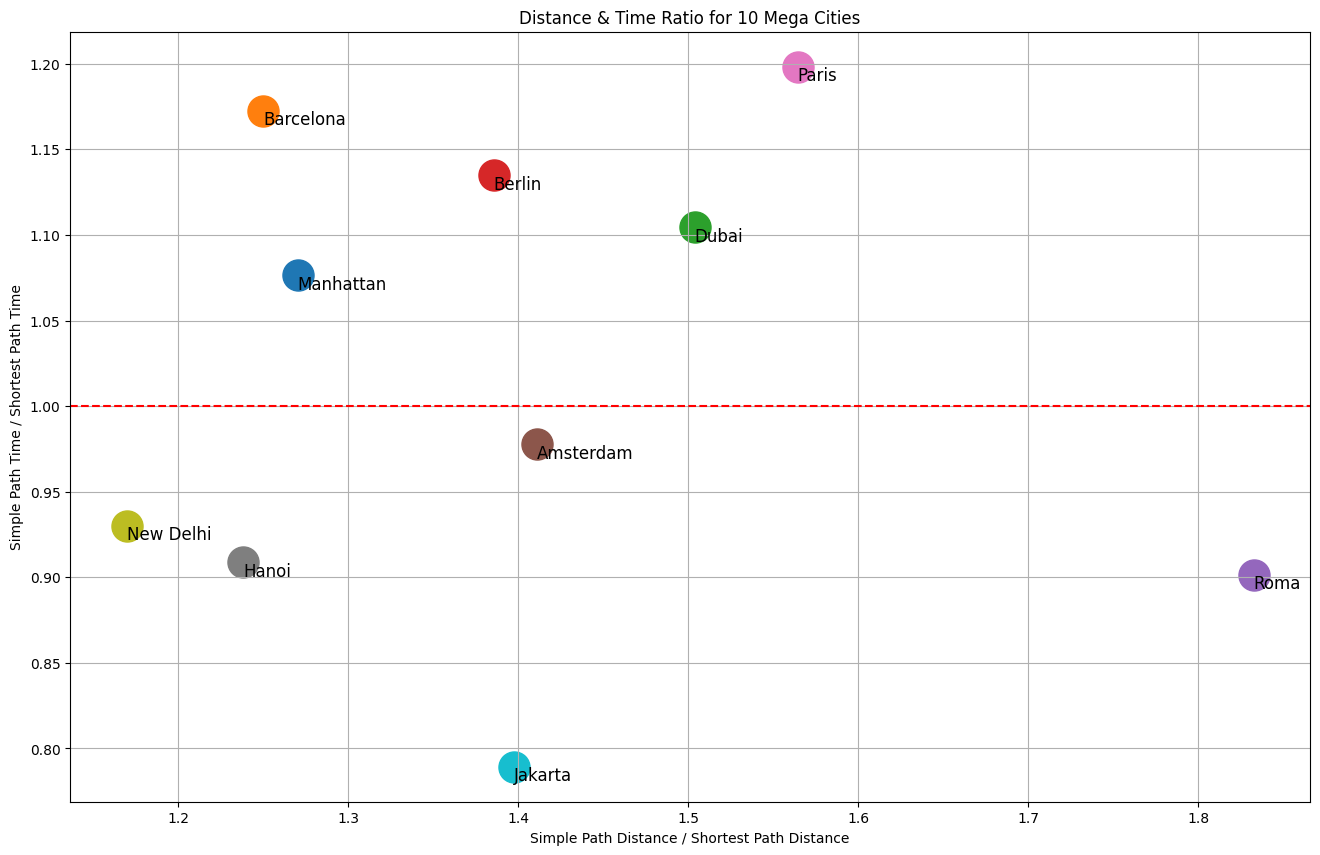

In [6]:
dists = []
times = []
# cities = ['Seoul', 'Busan', 'Incheon', 'Daegu', 'Ulsan', \
#           'Daejeon', 'Gwangju', 'Jeju', 'Changwon', 'Sejong']

cities = ['Manhattan', 'Barcelona', 'Dubai', 'Berlin', 'Roma', \
          'Amsterdam', 'Paris', 'Hanoi', 'New Delhi', 'Jakarta']


with open('../txt/intl.txt', 'r') as txt_file:
    for line in txt_file:
        city = line.strip().split(',')[0]

        sample_num = 100
        k          = 30

        with open(f'../result/{city}_ftpdt_{sample_num}_{k}.pkl', 'rb') as file1, \
            open(f'../result/{city}_spdt_{sample_num}_{k}.pkl', 'rb') as file2:
            ftpdt = pickle.load(file1)
            spdt   = pickle.load(file2)

        ftpd = ftpdt[:,0]
        ftpt = ftpdt[:,1]
        spd = spdt[:,0]
        spt = spdt[:,1]

        # idx1 = np.where(ftpd == -1)
        # idx2 = np.where(spd == -1)

        # all_idx = np.union1d(idx1, idx2)

        # ftpd = np.delete(ftpd, all_idx)
        # spd  = np.delete(spd, all_idx)
        # ftpt = np.delete(ftpt, all_idx)
        # spt  = np.delete(spt, all_idx)

        ratio1 = ftpd / spd
        ratio2 = ftpt / spt

        dist_mean = np.mean(ratio1)
        time_mean = np.mean(ratio2)

        dists.append(dist_mean)
        times.append(time_mean)



plt.figure(figsize=(16, 10))
for i, city in enumerate(cities):
    plt.scatter(dists[i], times[i], alpha=1, s=500)
    plt.text(dists[i], times[i], city, fontsize=12, verticalalignment='top')

plt.title('Distance & Time Ratio for 10 Mega Cities')
plt.xlabel('Simple Path Distance / Shortest Path Distance')
plt.ylabel('Simple Path Time / Shortest Path Time')
plt.axhline(y=1, color='red', linestyle='--')
plt.grid(True)
plt.show()
